1 July 2024 <br>
Mufarowashe Chiyangwa <br>
ST10261507 <br>
PDAN8411w
<br>
<br>
<br>
<br>
# POE Task 3 - Text Processing & Pipelines
<br>

## 1. What is text processing?

Text processing is the process of analyzing unstructured text data to extract meaningful insights using machine learning and natural language processing (NLP) tools (MonkeyLearn, 2019). Companies and organizations get a lot of raw text data via emails, social media, chat discusiions, and other platforms that contains thoughts and ideas regarding a wide range of subjects from which insights can be extracted. If companies and organizations want to extract these insights, the raw, unstructured text data must first be sorted, organized, and measured (MonkeyLearn, 2019). There are two broad categories of text processing: text classification and text extraction.

Text classification is when text data is classified into pre-defined categories based on its content (MonkeyLearn, 2019). Here are some common types of text classification:
- Topic analysis: groups large amounts of text data into topics or themes (MonkeyLearn, 2019).
- Sentiment analysis: detects sentiment or the underlying emotion in text data such as reviews, social media comments, and surveys (often classified as [positive; negative] or [positive; neutral; negative]) (MonkeyLearn, 2019).
- Intent detection: discovers the agenda behind text data and is useful for companies and organizations that seek to anticipate consumer decisions (MonkeyLearn, 2019). An example would be deciphering/anticipating consumer buying decisions (whether or not they are going to buy a product) based on product FAQs/queries.
- Language classification: detecting and classifying the language of text (MonkeyLearn, 2019).

Text extraction is the process of identifying and extracting valuable pieces of text from text data such as client names, product details, dates, and addresses (MonkeyLearn, 2019). Here are two types of text extraction:
- Keyword extraction: extracting keywords or expressions from text data in a specific context (MonkeyLearn, 2019). An example would be extracting keywords and expressions from the 100s of comments on an Instagram live done by Jordan Petersen to see what people were commenting about most.
- Entity extraction: extracting the names of entities such as dignitaries, celebrities, companies, and brands from text data in a specific context. This is especially useful for companies and organizations trying to identify potential competitors (MonkeyLearn, 2019). For example, Standard Bank identifies that ABSA is their closest competitor on pricing after conducting an entity extraction on pricing-related tweets.
<br>

## 2. What data set was chosen an why is it appropriate for text processing?

The chosen data set for this text processing task (sentiment analysis) is a hotel reviews data set originally from Datafiniti - one of the world's most well-known data-scraping platforms and repositories that scrapes data from all kinds of industries from the web and converts it into usable data sets (Datafiniti, 2024). The data set consists of 10 000 reviews from about 2000 hotels in the United States of America from Datafiniti's Business Database. The data set was obtained from data.world, and can be accessed using the following link: https://data.world/datafiniti/hotel-reviews/workspace/file?filename=Datafiniti_Hotel_Reviews.csv

The 25 features are described as follows (from data set inspection and reasonable assumption - no data dictionary available):

- id: unique hotel identifier
- dateAdded: the date that a hotel's reviews were added to the data set
- dateUpdated: the date that a hotel's reviews were updated in the data set
- address: the hotel address
- categories: hotel type/sub-categories/specifications
- primaryCategories: industries the hotel operates in
- city: the city that the hotel is located in
- country: the country that the hotel is located in (all are located in USA)
- keys: second unique hotel identifier
- latitude: the latitudinal coordinate of the hotel
- longitude: the longitudinal coordinate of the hotel
- name: the name of the hotel
- postalcode: the postal code of the hotel
- province: the province the hotel is located in
- reviews_date: the date that a review was made
- reviews_dateseen: the date that a review was seen
- reviews_rating: the rating given to a hotel by a reviewer (from 1 to 5)
- reviews_sourceurls: the URL of the review
- reviews_text: the written review itself
- reviews_title: the title of the review
- reviews_usercity: the city in which the reviewer resides
- reviews_userprovince: the province in which the viewer resides
- reviews_username: the reviewer alias
- sourceurls: the URL of the source where the review can be found
- websites: the hotel website
<br>

The data set needs to adhere to the following criteria in order to be appropriate for text processing:

- Text data: there must be some form of text data to process in the data set, whether it be reviews, comments, tweets, posts, or survey responses.
- Categorical target: the target variable of the dataset must be a discrete, categorical variable with mutually exclusive classes in order for sentiment analysis (the text processing task) to be undertaken on the data set.
- Data cleaning: it is important to clean data before any other analysis task is undertaken because sub-par data quality can affect the results of the classification analysis (Career Foundry, 2023).
- Text data preprocessing: the text data needed for the analysis will require preprocessing before it can be processed by the chosen machine learing algorithm. It will need to be free of punctuation, tags and special characters, and it will need to be in lower case, amongst other requirements.
- Balanced data: imbalanced data can skew the results of the performance metrics of the classification model that is going to process the text data, affecting their validity. A balanced data set ensures that the classification model is not "biased towards one class" (Medium, 2023), particularly the majority class, thus preserving the validity of the results obtained from the classification metrics.

Disclaimer: the chosen data set does not yet completely adhere to the above criteria, but will adhere to it after the sections where data cleaning, exploration and preprocessing are undertaken. 
<br>

## 3. Explanation of the analysis that will be conducted on the data set

We seek to conduct a sentiment analysis (defined earlier) on the chosen hotel reviews dataset in order to see how well we can predict positive and negative hotel review sentiment.

Objectives of the analysis:
- Conduct a thorough data cleaning, exploratory data analysis, and text data preprocessing before using the data to train any model.
- Produce a functional pipeline that cuts down some of the analysis steps and is convenient in its use.
- Embed a logistic regression algorithm in the pipeline that can predict positive and negative hotel review sentiment with high predictive potency.
- Integrate model improvement/optimization techniques with our pipeline during the model development stage.
- Calculate, interpret and understand the necessary model evaluation classification metrics.
<br>

## 4. The data analysis process

The various python libraries that are going to be required for the analysis are as follows:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
import string
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score

### 4.1. Data importation and cleaning

We begin the analysis by importing our dataset using Pandas' read_csv() method. We then use the head() method to get a preview of the first 10 rows of the dataset.

In [2]:
# import dataset
df = pd.read_csv('C:/Users/munas/Documents/VC Data Analytics Edu Resources/Programming for Data Analytics 1/POE/Task 3/Datafiniti_Hotel_Reviews.csv')
df.head(5)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


We can begin with verifying the number of rows and columns our data set has using the shape attribute.

In [3]:
# Shape of data set
df.shape

(10000, 25)

We then investigate the data types of our columns. That can be done by applying Pandas' info() method onto our dataframe.

In [4]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateSeen    

Our 'reviews.rating' column is a float variable. It is necessary to have it formatted as a categorical (integer) variable as it will be used to create our sentiment target variable. We can make this change using the astype() method and inspect the change using the unique() method.

In [5]:
# Change 'TARGET_5Yrs' data type from float to int
df['reviews.rating'] = df['reviews.rating'].astype(int)
df['reviews.rating'].unique()

array([5, 2, 4, 3, 1])

Now let's see if the data fame has any duplicates using the duplicated() method

In [6]:
# Check for duplicates
print("True or False, do duplicates exist in the dataset?\n{}".format(
    np.all(df.duplicated() == True)))

True or False, do duplicates exist in the dataset?
False


Let's check for missing values in the three columns that will be needed for our analysis: 'reviews.rating', 'reviews.text', and 'reviews.title'. We can do this using a chain of two methods, isna() and sum(), which will sum up the number of missing values per column.

In [7]:
# Check for missing values 
print("Missing values:\n{}".format(df[['reviews.rating', 'reviews.title', 'reviews.text']].isna().sum())) 

Missing values:
reviews.rating    0
reviews.title     1
reviews.text      1
dtype: int64


We observe that the 'reviews.title' and 'reviews.text' columns each have 1 missing value. Let's subset all the rows with missing values to investigate the matter further.

In [8]:
# Subsetting rows with missing values in 'reviews.title' and 'reviews.text' rows
# df.isna().any(axis=1) creates a boolean mask indicating rows where any value is missing in specified columns
df[df[['reviews.rating', 'reviews.title', 'reviews.text']].isna().any(axis=1)]

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
600,AWKkrZYpa4HuVbedPT1I,2018-04-08T09:00:00Z,2018-09-04T21:27:48Z,160 East Flamingo Road,"Hotels,Hotel",Accommodation & Food Services,Las Vegas,US,us/nv/lasvegas/160eastflamingoroad/-1348544144,36.115137,...,2018-03-29T00:00:00Z,4,https://www.booking.com/reviews/us/hotel/westi...,Bad: Fit and finish construction of rooms coul...,NaN,NaN,NaN,Anonymous,https://www.booking.com/reviews/us/hotel/westi...,http://www.westinvegas.com/
6723,AVwcmcqPkufWRAb5w-y1,2015-10-23T22:32:31Z,2018-03-06T00:33:22Z,250 Spring St,"Hotel,Hotels and motels",Accommodation & Food Services,Charleston,US,us/sc/charleston/250springst/-518306969,32.786271,...,"2016-06-18T00:00:00Z,2016-05-25T00:00:00Z,2016...",3,https://www.expedia.com/Charleston-Hotels-Holi...,NaN,Review,NaN,NaN,A verified traveler,https://foursquare.com/v/holiday-inn-express-c...,https://www.ihg.com/holidayinnexpress/hotels/u...


We'll remove row 6723 entirely - it has no text in the 'reviews.text' column and the title in its 'reviews.title' column is nonsensical. We can remove this row using Pandas' drop() method. 

In [9]:
df.drop(index=6723, inplace=True)
print("Missing values:\n{}".format(df[['reviews.rating', 'reviews.title', 'reviews.text']].isna().sum()))

Missing values:
reviews.rating    0
reviews.title     1
reviews.text      0
dtype: int64


For row 600, we can impute the 'reviews.title' missing value with something along the lines of what is written in the 'reviews.text' column for that row. First, we check what is written in row 600 of the 'reviews.text' column using the values[] accessor.

In [10]:
df['reviews.text'].values[600]

'Bad: Fit and finish construction of rooms could have been better. Good: n/a'

A good imputation of row 600's 'reviews.title' relevant to what is written in 'reviews.text' would be 'inadequate rooms'. We will impite this in row 600's 'reviews.text' using the at[] accessor.

In [11]:
df.at[600, 'reviews.title'] = 'inadequate rooms'
df.at[600, 'reviews.title']

'inadequate rooms'

Now we check again for missing values in the columns we are interested in to see if the issue has been resolved.

In [12]:
print("Missing values:\n{}".format(df[['reviews.rating', 'reviews.title', 'reviews.text']].isna().sum()))

Missing values:
reviews.rating    0
reviews.title     0
reviews.text      0
dtype: int64


Let's check the shape of our data set again to confirm that there are now 9999 rows.

In [13]:
# Shape of data set
df.shape

(9999, 25)

### 4.2. Brief exploratory data analysis

Before we do our data preprocessing, it would be interesting to investigate which industries have the hotels with the best ratings and which industries have the hotels with the worst ratings. We can do this by first creating a separate data frame with only the 'reviews.rating' and 'primaryCategories' columns, then creating two more subsetted dataframes - one containing only 5-star reviews and one cotaining only 1-start reviews. Afterwards, we can visualize these results.

In [14]:
# Creating subsets
df_ind_ratings = df[['reviews.rating', 'primaryCategories']]
df_5star = df_ind_ratings[df_ind_ratings['reviews.rating'] == 5]
df_1star = df_ind_ratings[df_ind_ratings['reviews.rating'] == 1]

Now that we have created our subsets, we can visualize the results using Seaborn's countplot() method. Let's begin with looking at the 5-star ratings distribution.

Text(0.5, 1.0, '5-star hotel rating distribution by industry')

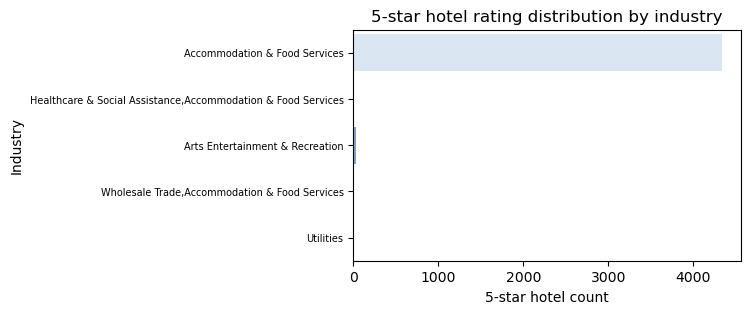

In [15]:
# df_5star countplot
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot(df_5star, y='primaryCategories', palette='Blues')
plt.ylabel("Industry")
plt.yticks(rotation=0, fontsize=7)
plt.xlabel("5-star hotel count")
plt.title("5-star hotel rating distribution by industry")

Now let's look at the 1-star ratings distribution.

Text(0.5, 1.0, '1-star hotel rating distribution by industry')

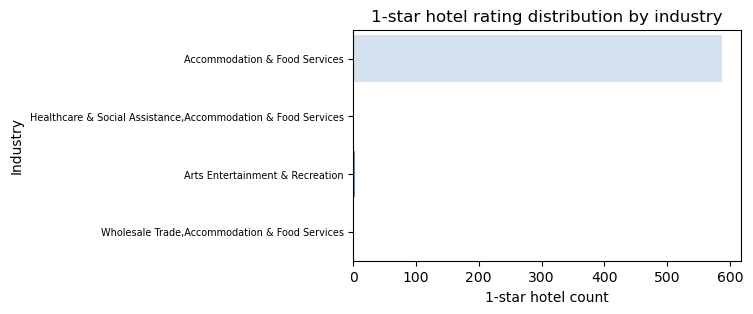

In [16]:
# df_1star countplot
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot(df_1star, y='primaryCategories', palette='Blues')
plt.ylabel("Industry")
plt.yticks(rotation=0, fontsize=7)
plt.xlabel("1-star hotel count")
plt.title("1-star hotel rating distribution by industry")

Yea, nothing interesting to see here. The Accomodation and Food Services industry is probably the industry with the most hotel reviews by a massive margin. We can confirm that quickly using Pandas' value_counts() method.

In [17]:
# Group revenue by temperature
df_ind_ratings['primaryCategories'].value_counts()

primaryCategories
Accommodation & Food Services                                    9927
Arts Entertainment & Recreation                                    45
Healthcare & Social Assistance,Accommodation & Food Services       18
Wholesale Trade,Accommodation & Food Services                       7
Accommodation & Food Services,Arts Entertainment & Recreation       1
Utilities                                                           1
Name: count, dtype: int64

A potentially more interesting insight would be to see the overall ratings distribution to get a quick gauge of the overall sentiment of the reviews in the entire data set. Let's spice things up a bit and visualize this using the Pyplot module's pie() method from Matplotlib.

Text(0.5, 1.0, 'Hotel ratings distribution')

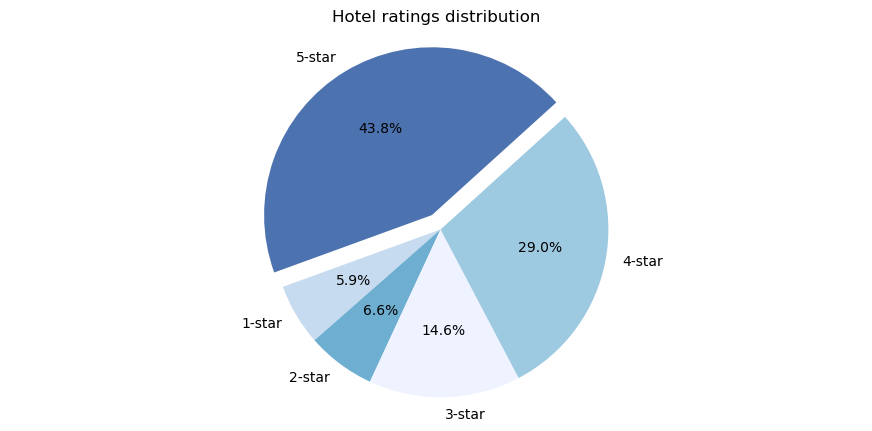

In [18]:
# pie chart with pyplot
counts = np.bincount(df_ind_ratings['reviews.rating']).tolist()[1:] # making a list of counts
labels = ['1-star', '2-star', '3-star', '4-star', '5-star'] # making chart labels
explode = (0, 0, 0, 0, 0.1) # offsets the 5-star slice
colors = ['#c6dbef', '#6daed1', '#eff3ff', '#9ecae1', '#4c72b0'] # defining color palette

plt.rcParams['figure.figsize'] = (11, 5)
plt.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=False, startangle=200, 
        colors=colors) # autopct='%1.1f%%' presents proportions rounded off to nearest tenth
plt.axis('equal') # ensures that pie is drawn as a circle  
plt.title('Hotel ratings distribution')

If we take 3-, 4-, and 5-star ratings as positive, and 2- and 1-star ratings as negative, we see that there is an overwhelmingly positive sentiment regarding this particular data set of hotel reviews, with approximately 87.4% of the total reviews being positive.

### 4.3. Data preprocessing

The two text columns that require preprocessing for our sentiment analysis are the 'reviews.title' and 'reviews.text' columns that we cleaned earlier along with the 'reviews.rating' column. However, before we preprocess these two text columns, we need to create our binary target variable using the 'reviews.rating' column by iterating through this column using a for loop and assigning a 0 for a rating of 1 or 2 (negative hotel review) and a 1 for a rating of 3, 4, or 5 (positive hotel review).

In [19]:
# instantiate an empty list where target variable will be stored
target = []

# create for loop that will iterate through 'reviews.rating'
for rating in df['reviews.rating']:
    if rating in [1, 2]:
        target.append(0) # append(0) will add 0 to list if above condition is fulfilled
    elif rating in [3, 4, 5]:
        target.append(1) # append(1) will add 1 to list if above condition is fulfilled
        
# add target variable to the dataframe
df['target'] = target

# print df['target'] and it shape
print(df['target'])

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: target, Length: 9999, dtype: int64


The last thing we need to do before we can preprocess our text data is to concatenate our two text-based columns that we are going to be using into one column. The 'reviews.text' column is where most of the needed text data is but 'reviews.title' still does contain some very relevant text information since it is representative of the title of the hotel review a consumer made, and could have very punchy, distinctive keywords in there used to summarize the sentiment of the review, just like how any other title in any other context would concisely highlight or accentuate the body of its respective text document. This concatenation can be done using Pandas' str.cat() method, which concatenates two string columns using a separator of one's choosing.

In [20]:
# concatenate 'reviews.title' and 'reviews.text' into one column
df['full.text'] = df['reviews.title'].str.cat(df['reviews.text'], sep=' ')
df[['reviews.title', 'reviews.text', 'full.text']][0:3]

,reviews.title,reviews.text,full.text
0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!! Our experience...
1,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity Amazing place. Everyone w...
2,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience We booked a 3 ...


Now we can begin preprocessing our text data. Let's assign 'full.text' to X (our feature) and 'target' to y (our target).

In [21]:
# X and y assignments
X = df['full.text']
y = df['target']

Our first preprocessing task is removing all the punctuation in X. We can do this by creating a user-defined function that strips away the punctuation using the punctuation string constant from the String module (that was imported earlier) that contains commonly used punctuation in string format (if the text item is not in the punctuation constant, it will be returned). We then apply that function to X using the apply() method from Pandas. The apply() method iteratively applies a function to a series or a specified row/column in a data frame.

In [22]:
# create function
def strip_punc(doc):
    nopunc = "".join(  # 'join' concatenates non-punctuation text items
        [text_item for text_item in doc if text_item not in string.punctuation]
    )
    return nopunc
    
# applying strip_punc to X
X_puncfree = X.apply(lambda doc: strip_punc(doc))

# viewing first 3 cells of X_puncfree
X_puncfree.head(3)

0    Best romantic vacation ever Our experience at ...
1    Sweet sweet serenity Amazing place Everyone wa...
2    Amazing Property and Experience We booked a 3 ...
Name: full.text, dtype: object

The next preprocessing task is making sure our documents (text cells) in our punctuation-free corpus (X_puncfree) are in lowercase. This can be done by applying the lower() method (in-built in Python) with the apply() method.

In [23]:
# apply lower() method
X_lower = X_puncfree.apply(lambda doc: doc.lower())

# viewing first 3 cells of X_lower
X_lower.head(3)

0    best romantic vacation ever our experience at ...
1    sweet sweet serenity amazing place everyone wa...
2    amazing property and experience we booked a 3 ...
Name: full.text, dtype: object

Now that we've removed punctuation from our corpus (which is X_lower at this point) and we've made it lowercase, it is ready to be tokenized. Tokenization is the process of splitting words in the documents (text cells) of a corpus by whatever separates them, which would be whitespace in this case. After these words are split, they are referred to as tokens and will be processed further so that they are suitable for use by a machine learning algorithm (Muller and Guido, 2016). We can tokenize our corpus by creating a user-defined function that uses Python's in-built split() method to split the words in the documents, then apply this function to our corpus with the apply() method.

In [24]:
# create function
def tokenize(doc):
    for word in doc:
        tokens = doc.split() # default separator is whitespace
        return tokens
    
# applying tokenize to X
X_tokenized = X_lower.apply(lambda doc: tokenize(doc))

# viewing first 3 cells of X_tokenized
X_tokenized.head(3)

0    [best, romantic, vacation, ever, our, experien...
1    [sweet, sweet, serenity, amazing, place, every...
2    [amazing, property, and, experience, we, booke...
Name: full.text, dtype: object

Once we've tokenized our corpus, we can remove stopwords. Put simply, stopwords are frequently occurring and uninformative words in our corpus that are generally used for the purposes of grammar and syntax in a language. Examples of stopwords are  'they', 'that' and 'am'. Removing stopwords helps us isolate the more informative words in our corpus that aid in understanding the themes/topics of our documents (Python Tutorials, 2024). We can remove stopwords from our corpus using the stopwords constant from the corpus module in the NLTK library (imported earlier) that contains a list of commonly used stopwords in natural language processing. We will need to incorporate the stopwords constant into a user-defined function that will return all the words in a document that are not in the stopwords constant, then apply that function to our corpus using the apply() method.

In [25]:
# download stopwords (if not downloaded already) with the following line of code before importing stopwords constant
# from corpus module from nltk library: nltk.download('stopwords')
# stopwords constant already imported

# Get the list of english stopwords (other languages are available)
stop_words = stopwords.words('english')

# create function
def strip_stop(doc):
    nostop = [text_item for text_item in doc if text_item not in stop_words]
    return nostop
    
# applying strip_stop to X_tokenized
X_stopfree = X_tokenized.apply(lambda doc: strip_stop(doc))

Let's do a quick stopwords vs no stopwords comparison. This is our first document in our corpus with stopwords...

In [26]:
X_tokenized.iloc[0]

['best',
 'romantic',
 'vacation',
 'ever',
 'our',
 'experience',
 'at',
 'rancho',
 'valencia',
 'was',
 'absolutely',
 'perfect',
 'from',
 'beginning',
 'to',
 'end',
 'we',
 'felt',
 'special',
 'and',
 'very',
 'happy',
 'during',
 'our',
 'stayed',
 'i',
 'would',
 'come',
 'back',
 'in',
 'a',
 'heart',
 'beat']

And this is the same document without stopwords.

In [27]:
X_stopfree.iloc[0]

['best',
 'romantic',
 'vacation',
 'ever',
 'experience',
 'rancho',
 'valencia',
 'absolutely',
 'perfect',
 'beginning',
 'end',
 'felt',
 'special',
 'happy',
 'stayed',
 'would',
 'come',
 'back',
 'heart',
 'beat']

Now that we've removed stopwords from our corpus, we can lemmatize it. Lemmatization is a form of word normalization that reduces words to their root form so they can all be processed by the machine learning algorithm as a single item. Lemmatization uses a dictionary of known word forms to reduce words to their base form (Muller and Guido, 2016). For example, 'running', 'ran' and 'runs' will all be converted to 'run'. Lemmatization also takes the role the word plays in the sentence into account (Muller and Guido, 2016). For example, we have two sentences: 1) "the saw was used to cut the wood", and 2) "i saw the ball". The 'saw' in sentence one will be recognized as a noun and will be attributed to the jaggered-edged tool used for carpentry/construction, whereas the 'saw' in sentence two will be recognized as a verb and will be attributed to the action of sight - it will thus be converted to the root word 'see'.

We can easily apply lemmatization to our corpus using the SpaCy library, which is an advanced natural language processing library with language models used for word normalization. Documentation of the SpaCy libaray can be found on the following URL: https://spacy.io/. We will make use of an english language model from SpaCy to lemmatize our corpus. A user-defined function will be created that will use this language model for lemmatization and this function will be applied to our corpus using the apply() method.

In [28]:
# change documents in corpus from lists to text with whitespace separator in between words - required for the language... 
# model is use.
# map() method will iterate through list items in documents and combine them with ' ' using join
X_stopfree = X_stopfree.map(' '.join)

# download the necessary language model with this line of code in the Anaconda prompt before importing spacy and 
# loading the language model: 'python -m spacy download en_core_web_sm'

# load the necessary english language model
elm = spacy.load('en_core_web_sm')

# create function
def lemmatize(doc):
    lemma = elm(doc)
    # accessing lemmas of tokens from lemma_ attribute
    return [text_item.lemma_ for text_item in lemma]
    
# apply function to X_stopfree
X_lemmatized = X_stopfree.apply(lambda doc: lemmatize(doc))

Let's do a quick unlemmatized vs lemmatized comparison. This is our first document in our corpus without lemmatization...

In [29]:
X_stopfree.iloc[0]

'best romantic vacation ever experience rancho valencia absolutely perfect beginning end felt special happy stayed would come back heart beat'

And the following is the same document with lemmatization applied to it. We see that 'best' was lemmatized to 'well'. Contextually, 'well' is not the most fitting lemma for 'best', but 'well' is synomymous with 'good' in some contexts and it carries the same sentiment so it will suffice. The word 'beginning' was changed to 'begin' and 'felt' was changed to 'feel' - these are good lemmatizations. There are a few other words that could've been lemmatized in this particular document (for example, 'stayed' could have been changed to 'stay'). Nonetheless, the SpaCy language model seems to have done an adequate job overall based on the example below.

In [30]:
X_lemmatized.iloc[0]

['well',
 'romantic',
 'vacation',
 'ever',
 'experience',
 'rancho',
 'valencia',
 'absolutely',
 'perfect',
 'begin',
 'end',
 'feel',
 'special',
 'happy',
 'stayed',
 'would',
 'come',
 'back',
 'heart',
 'beat']

Now we can turn our corpus into a numerical representation that can be processed by a machine learning algorithm. This process is known as bag-of-words vectorization, where a vocabulary of all the unique words in a corpus is built and for each document, the number of times a particular word in the corpus vocabulary appears in a document is counted and represented numerically. In this case, the number of features becomes the number of all the unique words in corpus vocabulary (Muller and Guido, 2016). As a demonstrative example, let's say we have a corpus with the following two documents: 1) "we went to the mall" and 2) "the mall was great". The corpus vocabulary is thus made up of the following seven unique words which equates to seven features (in alphabetical order): (great, mall, the, to, was, we, went). Therefore, the documents will be numerically represented as follows (respectively), with respect to the same order the features are listed in the corpus vocabulary: (0, 1, 1, 1, 0, 1, 1); (1, 1, 1, 0, 1, 0, 0).

This bag-of-words vectorization can easily be done using Scikit-Learn's CountVectorizer() transformer class imported earlier from the feature_extraction module.

In [31]:
# change documents in corpus from lists to text with whitespace separator in between words - required for... 
# the CountVectorizer() class. Use map() method.
X_lemmatized = X_lemmatized.map(' '.join)

# instantiate CountVectorizer() class
vectorizer = CountVectorizer()

# fit CountVectorizer() onto corpus and transform corpus
X_vectorized = vectorizer.fit_transform(X_lemmatized)

When we investigate the shape of X_vectorized, we see that the number of documents in the corpus stays at a number of 9999 (as it should), but now there are 17719 features representative of the total number of unique words in the corpus (the corpus vocabulary).

In [32]:
# shape of X_vectorized
X_vectorized.shape

(9999, 17719)

Our last preprocessing task is ensuring that our data set is balanced. From the earlier EDA, we saw that the data set does mostly consist of positive hotel reviews. We can confirm this again using the value_counts() method.

In [33]:
# Checking if data set is balanced
y.value_counts()

target
1    8746
0    1253
Name: count, dtype: int64

This data set definitely needs to be balanced. This can be achieved using SMOTE (imported earlier)  - a random oversampling technique from the Imbalanced-Learn library. The documentation for SMOTE is available on the following site: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [34]:
# Instantiating and fitting SMOTE and transforming the data
smote = SMOTE(random_state=0)
X_resamp, y_resamp = smote.fit_resample(X_vectorized, y)

Let's check to see if SMOTE adequately balanced the data.

In [35]:
# Checking if data set is balanced
y_resamp.value_counts()

target
1    8746
0    8746
Name: count, dtype: int64

We can also check the shape of X_resamp and y_resamp to make sure everything is in order.

In [36]:
# Shape of X_resamp and y_resamp
print('The shape of X_resamp is {}, and the shape of y_resamp is {}.'.format(X_resamp.shape, y_resamp.shape))

The shape of X_resamp is (17492, 17719), and the shape of y_resamp is (17492,).


Our text data preprocessing is complete. Our data now fulfills all criteria requirements regarding its appropriateness for use and is ready to be used.

### 4.4. Pipelines, model improvement and evaluation

Before we begin with our pipeline, we need to create our training and testing partitions using the train_test_split() method from Scikit-learn's model_selection module.

In [37]:
# train_test_split imported from model selection
# Creating our training and testing partitions of our feature and target variables (80/20 split)
# Stratify ensures that class labels are proportionately distributed between the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, stratify=y_resamp, 
                                                    test_size=0.2, random_state=0)

Let's check the shape of our training and testing partitions to ensure we have the desired result.

In [38]:
# Shapes of training and testing partitions
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (13993, 17719)
Shape of X_test: (3499, 17719)
Shape of y_train: (13993,)
Shape of y_test: (3499,)


#### 4.4.1. Pipelines and model improvement

To put it very simply, pipelines allow us to chain together multiple steps in the model-building process. Often times, pipelines are used to chain data preprocessing steps with the training of a supervised machine learning model (Muller and Guido, 2016). Pipelines can be easily implemented in Python using the Scikit-Learn library's Pipeline() class (imported earlier from the pipeline module). We seek to make a pipeline that will chain the following three steps (the first two are technically data preprocessing steps):

- The term frequency-inverse document frequecy rescaler (tf-idf): the idea behind this rescaler is to give prominence to tokens (or features) that appear often in particular documents but not in many documents in the corpus. If a word or token appears often in a particular document but not in many documents in the corpus, it is likely to be very informative with respect to the document it is in (Muller and Guido, 2016). The TfidfTransformer() class from Scikit-Learn's feature_extraction module (already imported) makes this possible by taking the sparse matrix output of the CountVectorizer() class and transforming it accordingly.
- Standard scaling: We can use the StandardScaler() class from the preprocessing module in the Scikit-learn library (imported earlier) to standardize our features. StandardScaler() works by subtracting the mean from all features to centre them then dividing them by their standard deviation so they all have a unit variance. This will make it easier for our classification algorithm to learn the patterns in the data.
- Logistic regression: this is the classification algorithm of choice because it works very well with high-dimensional, sparse data (of which we have) and is simple to implement and optimize (Spot Intelligence, 2023). The LogisticRegression() class was imported earlier from Scikit-Learn's linear_model module.

Let's build our pipeline.

In [39]:
# instantiating pipeline class (building pipeline object)
# each step is a tuple containing a name of your choosing and an estimator instance
# in this case, have to set with_mean parameter of StandardScaler to False because sparse matrices caanot be centred
pipe = Pipeline([("tfidf", TfidfTransformer()), ("scaler", StandardScaler(with_mean=False)), 
                 ("logreg", LogisticRegression(max_iter=1000))])

Before we pass our training data through our pipeline, we can combine our pipeline with GridSearchCV (imported earlier from Scikit-Learn's model_selection module) to optimize the LogisticRegression() instance in our pipeline by tuning its hyperparameters. We start by defining our parameter grid as two key-value pairs:

- The first is of the kind of regularization that will be applied to the logistic regression model, whether it be L1 regularization (Lasso), L2 (Ridge) regularization, or elastic net regularization (a combination of L1 and L2). Ridge (L2) is the default.
- The second is that of the C parameter, which controls the strength of the regularization. A higher C results in less regularization, whereas a lower C results in more regularization (Muller and Guido, 2016).

The Scikit-Learn documentation for logistic regression can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [40]:
# defining parameter grid
# have to map relevant key-value pair to correct instance in pipeline with 'name-of-instance__parameter' format
# example: 'logreg_C'
param_grid = {"logreg__penalty": ['l1', 'l2', 'elasticnet'], 
             "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100]}

Next, we instantiate our GridSearchCV() object (incorporating our pipelie into it) and fit it onto the training set.

In [41]:
# Instantiation and fitting of GridSearchCV with pipeline incorporated
# Pipeline() class is designed in such a way where proper cross validation is done - no information leakage occurs from... 
# the validation fold into the training fold.
# most of the warning/error messages that show up have to do with solver-regularization compatibility - nothing to...
# worry about
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

C:\Users\munas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\munas\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\munas\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\munas\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfTransformer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet']})

We can call the best_score_ and best_estimator_ attributes from our grid search object to see how well the logistic regression performed on the training set amd which hyperparameters were most optimal.

In [42]:
print("Best cross-validation accuracy: {:.4f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.9203
Best parameters: {'logreg__C': 0.001, 'logreg__penalty': 'l2'}


The logistic regression model performed really well (accuracy wise) on the training set, and it seems like it needed quite a lot of regularization (really low C) to produce that 92.03% accuracy. Let's see how this specific logistic regression instance performs on the test set.

In [43]:
print("Test set score: {:.4f}".format(grid.score(X_test, y_test)))

Test set score: 0.9148


We get a really good test set accuracy as well, and the model seems to be generalizing well too seeing as the test set accuracy is not far off from the training set accuracy.

#### 4.4.2. Model Evaluation Part 1 - Confusion matrix and classification report

Accuracy alone (understood as the number of correctly classified instances divided by the total number of instances, or (TP + TN) / (TP + TN + FP + FN) (TP, TN, FP and FN are defined later)) isn't the best way to evaluate the performance of a classification model because it "hides the detail you need to better understand the performance of your classification model" (Analytics Vidhya, 2020).

A great way to better understand the performance of our logistic regression model is by using a confusion matrix, which is “a table that is often used in ML to describe the accuracy of a classification model” (Verma and Rubin, 2018). From this confusion matrix, predictions made by a classifier (which can either be positive or negative, often represented numerically as 1 and 0 respectively for a binary classifier) are deemed as either a true positive (TP), a false positive (FP), a true negative (TN) or a false negative (FN). A true positive is a case where a predicted outcome is predicted as positive and is actually positive (Verma and Rubin, 2018). A false positive is a case where a predicted outcome is predicted to be positive and is actually negative (Verma and Rubin, 2018), also known as a Type 1 error (Analytics Vidhya, 2020). A true negative is a case where a predicted outcome is predicted to be negative and is actually negative (Verma and Rubin, 2018). Lastly, a false negative is a case where a predicted outcome is predicted to be negative and is actually positive (Verma and Rubin, 2018), also known as a Type 2 error (Analytics Vidhya, 2020).

A confusion matrix is easily created in Python using the confusion_matrix() method from Scikit-learn's metrics module. It can then be plotted using Seaborn's heatmap() method:

Text(0.5, 1.0, 'Confusion Matrix')

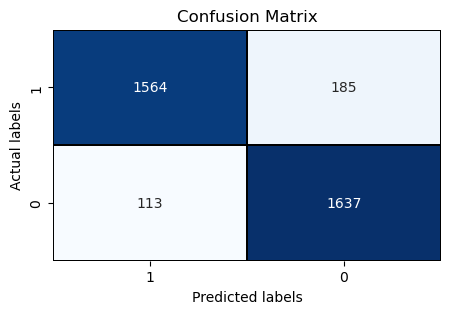

In [44]:
# Confusion matrix
y_pred = grid.predict(X_test) # grid search object has a predict method like a normal classifier object would
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# plot confusion matrix with seaborn
# Plot confusion matrix
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linecolor='black', linewidth=0.2, 
           xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix")

From this confusion matrix, we gather that our logistic regression model produced the following classification results on the testing set with regards to predicting hotel review sentiment:

- 1564 true positives (TP - upper left), which means that it predicted 1564 hotel reviews to be positive that actually were positive.
- 185 false negatives (FN - upper right), which means that it predicted 185 hotel reviews to be negative that actually were positive.
- 113 false postives (FP - lower left), which means that it predicted 113 hotel reviews to be positive that actually were negative.
- 1637 true negatives (TN - lower right), which means that it predicted 1637 hotel reviews to be negative that actually were negative.

The model produces very low type 1 and 2 errors (FPs and FNs respectively) in proportion to its TPs and TNs. To better understand this model's performance regarding our goal (investigating how well a logistic regression model can predict positive and negative hotel reviews), there are specific ratio-based metrics we can look into derived from the confusion matrix that will help us better understand how the elements of the confusion matrix interact together to help us understand the predictive performance of our model:

- Precision: measures the "proportion of true positive predictions among all positive predictions made by the model" (Medium, 2024), calculated as (TP / (TP + FP)), where a perfect precision score is 1.
- Recall (Sensitivity): measures the "the proportion of true positive predictions among all actual positive instances" (Medium, 2024), calculated as (TP / (TP + FN)), where a perfect recall score is 1.
- F1-score: measures the "harmonic mean of precision and recall" (Medium, 2024), and "provides a single metric that combines both precision and recall, balancing the trade-off between the two" (Medium, 2024), and is especially useful for imbalanced data sets where precision and recall results may be skewed (Medium, 2024). It is calculated as ((2 * Precision * Recall) / (Precision + Recall)), where a perfect f1-score is 1.
- Negative predictive value: measures the proportion of true negative predictions among all negative predictions made by the model" (Verma and Rubin, 2018), calculated as (TN / (TN + FN)), where a perfect negative predictive value score is 1.
- Specificity: measures the proportion of true negative predictions among all actual negative instances, calculated as (TN / (TN + FP)), with a perfect specificity score being 1 (Towards Data Science, 2019).

These metrics are summarized for us very nicely using the classicifcation_report() method from Scikit-learn's metrics module:

In [45]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1750
           1       0.93      0.89      0.91      1749

    accuracy                           0.91      3499
   macro avg       0.92      0.91      0.91      3499
weighted avg       0.92      0.91      0.91      3499



It is important to note that the classification_report() method calculates precision, recall and the f1-score for both classes as if they were the positive class then averages those values out (per class) using two average metrics (macro and weighted average). Therefore, Class 0's precision and recall are Class 1's negative predictive value and specificity respectively in this case, since we are treating Class 1 as the positive class. Class 0's f1-score can be treated as a harmonic mean between negative predictive value and specificity for Class 1. The metrics are interpreted as follows:

Predictive performance of positive hotel reviews:
- Precision: an approximate precision score of 0.93 for Class 1 tells us that out of all the times the logistic regression model predicted that a hotel review was positive, it made the correct prediction approximately 93% of the time.
- Recall: an approximate recall score of 0.89 for Class 1 tells us that out of all the positive instances in the testing set (that is, out of all the positive hotel reviews), the logistic regression model managed to capture approximately 89% of those positive instances (TP + FN).
- F1-score: an approximate f1-score of 0.91 for Class 1 gives us a very impressive harmonic mean of this model's predictive power regarding the prediction of Class 1, taking into account the weaknesses of both precision and recall. This model is very effective at predicting hotel reviews with positive sentiment.
<br>

Predictive performance of negative hotel reviews:
- Negative predictive value: an approximate negative predictive value score of 0.90 for Class 1 (Class 0's precision) tells us that out of all the times the logistic regression model predicted that a hotel review was negative, it made the correct prediction approximately 90% of the time.
- Specificity: an approximate specificity score of 0.94 for Class 1 (Class 0's recall) tells us that out of all the negative instances in the testing set (that is, out of all the negative hotel reviews), the logistic regression model managed to capture approximately 94% of those negative instances (TN + FP).
- "Negative class" F1-score: an approximate "negative class" f1-score of 0.92 (Class 0's F1-score) gives us a very impressive harmonic mean of this model's predictive power regarding the prediction of Class 0, taking into account the weaknesses of both negative predictive value and specificity. This model is very effective at predicting hotel reviews with negative sentiment.

Comparisons: 
- The model has a slightly higher precision (0.93) than it does a negative predictive value score (0.90). The model is slightly better at making positive predictions than it is at making negative predictions.
- The model has a slightly higher specificity (0.94) than it does recall (0.89). The model managed to capture a slightly higher percentage of negative instances in the test set compared to the amount of positive instances it managed to capture.
- The model has a slightly higher "negative class" (Class 0) f1-score than it does (Class 1) f1-score. Overall, the model's predictive power leans slightly more towards the negative class in context with this data set (Class 0).

#### 4.4.3. Model Evaluation Part 2 - ROC and AUC

ROC curves, put simply, are graphs that summarize the trade-off between the true positive rate and the false positive rate of a classification model using varying probability thresholds (Machine Learning Mastery, 2023), where true positive rate (TPR), false positive rate (FPR) and the probability threshold are defined as follows:

- True positive rate (TPR): measures the "the proportion of true positive predictions among all actual positive instances" (Medium, 2024), calculated as (TP / (TP + FN)), where a perfect true positive rate score is 1. True positive rate is also known as recall or sensitivity. TPR tells us how good our model is at capturing positive instances.
- False positive rate (FPR): also known as inverted specificity (1 - specificity) or the false alarm rate, measures the proportion of false positive predictions among all actual negative instances, calculated as (FP / (FP + TN)) (Machine Learning Mastery, 2023). FPR tells us how often our model misclassifies negative instances.
- Probability threshold: this is a probability threshold that dictates how classes are defined. For example, if our probability threshold is 0.5, then any probabilistic prediction less than 0.5 would be our negative class and any probabilistic prediction more than or equal to 0.5 would be our positive class (Machine Learning Mastery, 2023).

From the ROC curve, we can select the most optimal probability threshold for our predictive model that maximizes the TPR (recall) and minimizes the FPR (therefore also maximizing specificity). However, this assumes that the ROC curve has perfect curvature. In most cases, the curve is not perfectly curved and the aim is picking a threshold that either maximizes TPR (recall) or minimizes FPR (maximizes specificity) depending on one's objective. As much as we can optimize the discriminative capability of a classification model by plotting an ROC curve (TPR vs FPR), we can also quantify how skillful our model is at discriminating between the positive and negative class using the AUC, which is a calculation of the two dimensional area underneath the plotted ROC curve. The AUC ranges from 0.5 (which would represent a non-skillful classifier that assigns completely random predictions at each probability threshold) to 1 (which would represent a skillful classifier that has perfect discriminative ability) (Machine Learning Mastery, 2023).

We can create our ROC curve points we will use to plot our graph using the roc_curve() method imported from Scikit-learn's metrics module. As inputs, the method takes in our target variable from our test set (y_test) and its respective predicted probabilities. We start off by creating the predicted probabilities for our logistic regression model using the predict_proba() method, as well as those of a simulated random classifier.

In [46]:
# simulating probabilities that a random classifier would produce and producing probabilities using X_test for...
# logistic regression model using predict_proba() method
r_probs = [0 for _ in range(len(y_test))] # an absolutely random classifier would very likely get all predictions wrong
logreg_probs = grid.predict_proba(X_test) # grid search object has a predict_proba method 

We then subset the probabilities of Class 1, the positive class.

In [47]:
# Keeping Class 1 probabilities
logreg_probs = logreg_probs[:, 1]

Before we plot our ROC curves of the logistic regression model and the simulated random classifier (as a reference), we now have enough information to calculate our AUC scores for the models using the roc_auc_score() method from Scikit-learn's metrics module.

In [48]:
# AUC scores for classifiers (including simulated random = 0.5 [baseline])
r_auc = roc_auc_score(y_test, r_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

print("AUC scores for classifiers:\nSimulated Random Classifier: {:.4f}\nGaussian Naive Bayes: {:.4f}".format(
    r_auc, logreg_auc))

AUC scores for classifiers:
Simulated Random Classifier: 0.5000
Gaussian Naive Bayes: 0.9727


The AUC scores will be used for the graph's legend but just from these scores, we can see just how skillful our logistic regression model is compared to the random classifier. We see the simulated random classifier gets an AUC score of 0.5, of which it should. The logistic regression model gets a much higher AUC of approximately 0.97, which tells us that the logistic regression model is extremely skillful at discriminating between the positive class and the negative class.

Let's now calculate the TPR and FPR values for our models (that we will need to plot the graph) using the roc_curve() method.


In [49]:
# Calculating ROC curve points
# Thresholds for tweaking tpr/fpr rate accordingly
r_fpr, r_tpr, thresholds = roc_curve(y_test, r_probs)
logreg_fpr, logreg_tpr, thresholds = roc_curve(y_test, logreg_probs)

We can now plot our ROC curves to visualize the AUC results using Matplotlib's pyplot module.

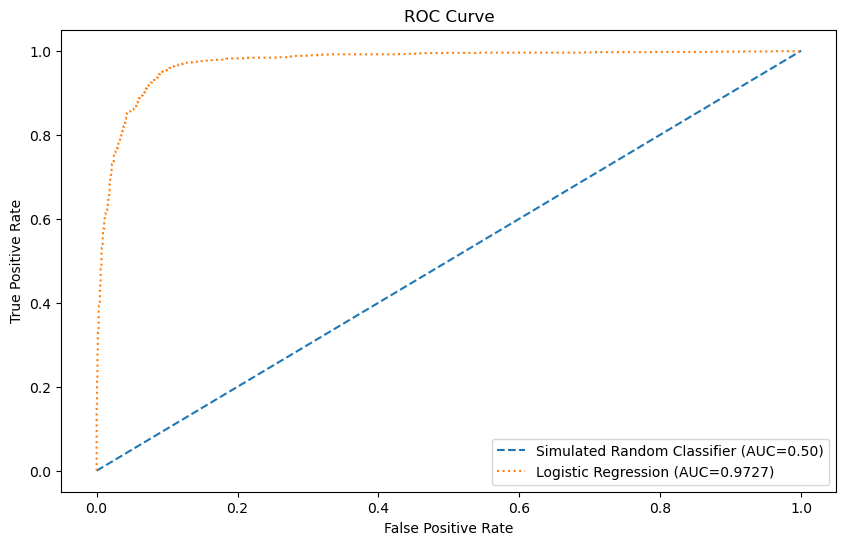

In [50]:
# Plotting ROC curve
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Simulated Random Classifier (AUC={:.2f})'.format(r_auc))
plt.plot(logreg_fpr, logreg_tpr, linestyle='dotted', label='Logistic Regression (AUC={:.4f})'.format(logreg_auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## 5. Conclusion

Objectives of the analysis were successfully completed:
- A thorough data cleaning, exploratory data analysis, and text data preprocessing was conducted before using the data to train our model.
- A functional pipeline was built that cut down some of the analysis steps and aided in convenience.
- A logistic regression algorithm that can predict positive and negative hotel review sentiment with high predictive potency was successfully embedded in the pipeline.
- Model improvement/optimization techniques were successfully integrated with the pipeline during the model development stage.
- The necessary model evaluation classification metrics were calculated, interpreted and understood.

## 6. References

1. Analytics Vidhya. 2020. Accuracy and its shortcomings: Precision, Recall to the rescue, 1 December 2020. [Online]. Available at: https://www.analyticsvidhya.com/blog/2020/12/accuracy-and-its-shortcomings-precision-recall-to-the-rescue/

2. Career Foundry. 2023. What Is Data Cleaning and Why Does It Matter?, 14 September 2023. [Online]. Available at: https://careerfoundry.com/en/blog/data-analytics/what-is-data-cleaning/

3. Datafiniti. 2024. About, 2024. [Online]. Available at: https://www.datafiniti.co/about

4. Machine Learning Mastery. 2023. How to Use ROC Curves and Precision-Recall Curves for Classification in Python, 11 October 2023. [Online]. Available at: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

5. Medium. 2023. Introduction to Balanced and Imbalanced Datasets in Machine Learning, 9 August 2023. [Online]. Available at: https://medium.com/cord-tech/introduction-to-balanced-and-imbalanced-datasets-in-machine-learning-be60c6eeb8be

6. Medium. 2024. Understanding Precision, Recall, F1-score, and Support in Machine Learning Evaluation, 15 February 2024. [Online]. Available at: https://medium.com/@nirajan.acharya666/understanding-precision-recall-f1-score-and-support-in-machine-learning-evaluation-7ec935e8512e

7. MonkeyLearn. 2019. Text Processing: What Is It?, 15 November 2019. [Online]. Available at: https://monkeylearn.com/blog/text-processing/

8. Muller, A. C. and Guido, S. 2016. Introduction to Machine Learning with Python. California: O'Reilly Media.

9. Python Tutorials. 2024. NLTK stop words, 2024. [Online]. Available at: https://pythonspot.com/nltk-stop-words/

10. Spot Intelligence. 2023. How To Implement Logistic Regression Text Classification In Python With Scikit-learn and PyTorch, 22 February 2023. [Online]. Available at: https://spotintelligence.com/2023/02/22/logistic-regression-text-classification-python/

11. Towards Data Science. 2019. Precision & Recall or Specificity & Sensitivity?, 5 August 2019. [Online]. Available at: https://towardsdatascience.com/

12. Verma, S., & Rubin, J. 2018. Fairness definitions explained. Proceedings - International Conference on Software Engineering: 1-7.